In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing


In [2]:
fileName = "KOLabels.csv"
df = pd.read_csv(fileName)

x = df[['Mean','SD']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df[['Mean','SD']] = pd.DataFrame(x_scaled)

df2018 = df[:53]
df2019 = df[53:].reset_index(drop = True)

In [3]:
kmeans = KMeans(n_clusters = 3, random_state = 0)

In [4]:
X_train = np.array(df2018[['Mean','SD']])

In [5]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [6]:
#Question 1
print('Question 1')
distortions = []
kModels = []
for k in range(1,9):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
    kModels.append(kmeanModel)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])



Question 1


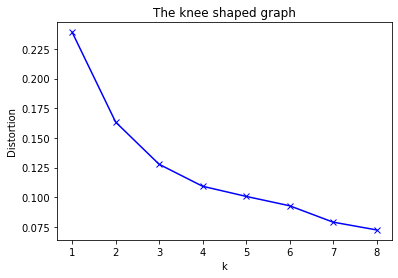

In [7]:
# Plot the elbow
plt.plot([k for k in range(1,9)], distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The knee shaped graph')
plt.show()

In [24]:
print('We can see that the best k is 3 or 4, we will take 4')

We can see that the best k is 3 or 4, we will take 4


In [10]:
k = 4
reds = [0 for i in range(k)]
greens = [0 for i in range(k)]

In [12]:
kModels[3].cluster_centers_

array([[0.16542805, 0.67145289],
       [0.28938069, 0.33961451],
       [0.58142077, 0.11869735],
       [0.61403279, 0.46891213]])

In [ ]:
# Question 2
print('\nQuestion 2')
kmeanModel = kModels[k-1]

for i in range (len(df2019)):
    x = np.array(df2019[i:i+1][['Mean','SD']])
    close = kmeanModel.predict(x)
    
    close = int(close)
    if df2019.at[i,'Label'] == 'Good':
        reds[close] += 1
    else:
        greens[close] += 1
    

In [21]:
redPercents = []
greenPercents = []
for i in range(k):
    res = '0'
    if (greens[i]+reds[i]) != 0:
        res = reds[i]/(greens[i] + reds[i]) * 100
        '{0:.2f}'.format(res)
        greenPercents.append('{0:.2f}'.format(100-res))
    else:
        greenPercents.append(res)
    redPercents.append(res)
        
print(greenPercents)


Question 2
['0', '55.56', '14.04', '70.37']


In [22]:
results = pd.DataFrame(columns = ['Greens Percentage','Reds Percentage'])
results['Greens Percentage'] = greenPercents
results['Reds Percentage'] = redPercents
results

,Greens Percentage,Reds Percentage
0,0,0
1,55.56,44.4444
2,14.04,85.9649
3,70.37,29.6296


In [23]:
# Question 3
print('\nQuestion 3')
print('None of the clusters have a pure disctribution of red or green')
print('Note:- Cluster 0 has no elements because of the difference in shapes of graphs of 2018 and 2019')


Question 3
None of the clusters have a pure disctribution of red or green
Note:- Cluster 0 has no elements because of the difference in shapes of graphs of 2018 and 2019
